In [ ]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [ ]:
# !pip install mglearn

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline # 그래프를 표시하기위한 명령. 최신 버전은 필요없음.

### knn의 k가 3인 경우의 알고리즘(분류- 범주형 값의 예측)

C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


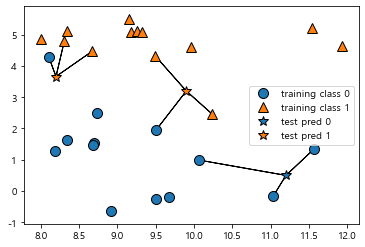

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


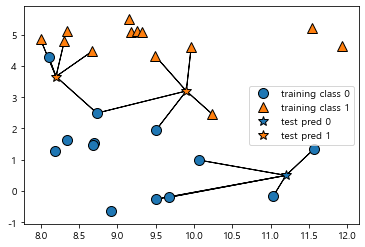

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

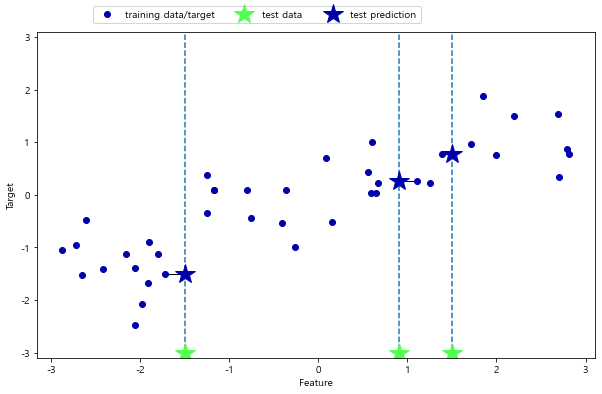

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

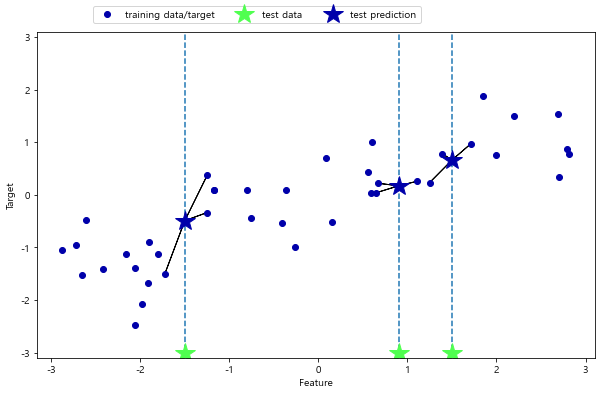

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

### 하이퍼 파라미터 k에 따른 결정경계

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, y_train.shape

((19, 2), (19,))

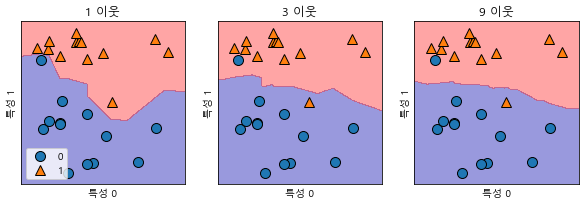

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

## 유방암 데이터 셋 실습

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
cancer.target.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cancer.data
y = cancer.target
# stratify : 0과 1 값도 비율에 따라 분류. label 값이 한쪽 값이 너무 작을 때, 랜덤 분류시 한쪽 값만 선택될 수 있으니, 
#            label 비율도 맞추어 분류.
# random_state=77 : 데이터 셋을 랜덤하게 나눌 때, 난수 초기 값을 고정시킨다. 같은 값이면 같은 결과를 재현가능.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target, random_state=77)

In [ ]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

y_train_1 = (y_train == 1).sum()
y_train_0 = len(y_train) - (y_train == 1).sum()

y_test_1 = (y_test == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

426


In [ ]:
print( "y_train y_test => 1의 개수, 1의 개수", y_train_1, y_test_1 )
print( "y_train y_test => 0의 개수, 0의 개수", y_train_0, y_test_0)

## target의 확인
print( "1: y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_1, y_test_1,
                                            y_train_1/y_1_all, y_test_1/y_1_all) )

print( "0 :y_train:{}, y_test:{}, 비율 {}, {}".format(y_train_0, y_test_0,
                                            y_train_0/y_0_all, y_test_0/y_0_all) )

y_train y_test => 1의 개수, 1의 개수 267 90
y_train y_test => 0의 개수, 0의 개수 159 53
1: y_train:267, y_test:90, 비율 0.7478991596638656, 0.25210084033613445
0 :y_train:159, y_test:53, 비율 0.75, 0.25


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 우리가 지정하는 파라미터 = 하이퍼 파라미터(n_neighbors=3)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
(pred == y_test).sum() / len(pred)

0.916083916083916

In [ ]:
model.score(X_test, y_test)

0.916083916083916

In [ ]:
for n in range(1,10):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    print(f"parameter = {n} :",model.score(X_test, y_test))

parameter = 1 : 0.8881118881118881
parameter = 2 : 0.9020979020979021
parameter = 3 : 0.9090909090909091
parameter = 4 : 0.9020979020979021
parameter = 5 : 0.916083916083916
parameter = 6 : 0.9020979020979021
parameter = 7 : 0.9090909090909091
parameter = 8 : 0.9090909090909091
parameter = 9 : 0.9090909090909091


#### 과대적합(모델이 훈련데이터에 더 적응되었다.)

In [ ]:
model.score(X_train, y_train)

0.9460093896713615

In [ ]:
model.score(X_test, y_test)

0.9090909090909091

#### 5-5 (추가) k값별 선그래프 그려보기(x축 k값, y축정확도) - 코드 댓글

In [ ]:
k_keys = []
y_values = []
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    k_keys.append(k)
    y_values.append(model.score(X_test, y_test))
print(len(k_keys), k_keys)
print(len(y_values), y_values)

10 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10 [0.8881118881118881, 0.9020979020979021, 0.9090909090909091, 0.9020979020979021, 0.916083916083916, 0.9020979020979021, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


In [ ]:
k_dat = {'k값':k_keys, '정확도':y_values}
dat = pd.DataFrame(k_dat)
dat

,k값,정확도
0,1,0.888112
1,2,0.902098
2,3,0.909091
3,4,0.902098
4,5,0.916084
5,6,0.902098
6,7,0.909091
7,8,0.909091
8,9,0.909091
9,10,0.909091


<AxesSubplot:xlabel='k값', ylabel='정확도'>

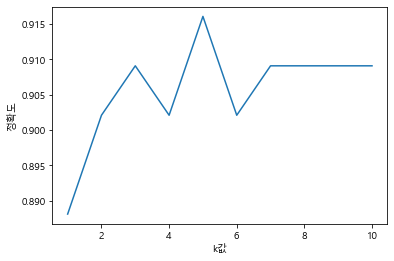

In [ ]:
import seaborn as sns
sns.lineplot(x='k값', y='정확도', data=dat)